In [ ]:
from google.colab import drive
drive.mount('/content/MyDrive')

Mounted at /content/MyDrive


In [ ]:
#!mkdir  /content/MyDrive/MyDrive/Twitter_dataset_final/Data_v13

mkdir: cannot create directory ‘/content/MyDrive/MyDrive/Twitter_dataset_final/Data_v13’: File exists


In [ ]:
#!cp -R /content/MyDrive/MyDrive/Twitter_dataset_final/Final_Dataset_v1 /content/MyDrive/MyDrive/Twitter_dataset_final/Data_v13

#Installing necessary packages:

In [ ]:
!pip install tweepy
!pip install googletrans
!pip install deep_translator # To translate from one language to another
!pip install flair # To find sentiment of the tweets
!pip install langdetect

     |████████████████████████████████| 55 kB 2.9 MB/s 
     |████████████████████████████████| 1.3 MB 19.2 MB/s 
     |████████████████████████████████| 42 kB 1.4 MB/s 
     |████████████████████████████████| 65 kB 4.1 MB/s 
     |████████████████████████████████| 53 kB 2.6 MB/s 
  Created wheel for googletrans: filename=googletrans-3.0.0-py3-none-any.whl size=15735 sha256=c31437fb69c40e2dbdcc219055f11664a756475751ee8346f846b09a2d7d3523
  Stored in directory: /root/.cache/pip/wheels/20/da/eb/a54579056f265eede0417df537dd56d3df5b9eb2b25df0003d
Successfully built googletrans
     |████████████████████████████████| 128 kB 11.9 MB/s 
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3
     |████████████████████████████████| 402 kB 8.2 MB/s 
     |████████████████████████████████| 19.7 MB 1.2 MB/s 
     |████████████████████████████████| 84 kB 3.7 MB/s 
     |█

In [ ]:
import os
import csv
import pickle
import re
import tweepy 
import datetime
import numpy as np
import pandas as pd
import collections
from langdetect import detect
from deep_translator import GoogleTranslator
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
import spacy
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('vader_lexicon')
nltk.download('stopwords')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [ ]:
!unzip '/content/MyDrive/MyDrive/Twitter_dataset_final/Data_v14/datav11.zip' -d  '/content/MyDrive/MyDrive/Twitter_dataset_final/Data_v14'

Archive:  /content/MyDrive/MyDrive/Twitter_dataset_final/Data_v14/datav11.zip
   creating: /content/MyDrive/MyDrive/Twitter_dataset_final/Data_v14/content/content/Twitter_Dataset/
   creating: /content/MyDrive/MyDrive/Twitter_dataset_final/Data_v14/content/content/Twitter_Dataset/smritiirani/
   creating: /content/MyDrive/MyDrive/Twitter_dataset_final/Data_v14/content/content/Twitter_Dataset/smritiirani/Rep/
 extracting: /content/MyDrive/MyDrive/Twitter_dataset_final/Data_v14/content/content/Twitter_Dataset/smritiirani/Rep/1507962834101039111.csv  
  inflating: /content/MyDrive/MyDrive/Twitter_dataset_final/Data_v14/content/content/Twitter_Dataset/smritiirani/Rep/1507617236692832256.csv  
 extracting: /content/MyDrive/MyDrive/Twitter_dataset_final/Data_v14/content/content/Twitter_Dataset/smritiirani/Rep/1507744106545512451.csv  
  inflating: /content/MyDrive/MyDrive/Twitter_dataset_final/Data_v14/content/content/Twitter_Dataset/smritiirani/Rep/1507756590128009216.csv  
  inflating: /co

In [ ]:
!zip -r /content/datav14_v1.zip /content/MyDrive/MyDrive/Twitter_dataset_final/Data_v14/Final_Dataset_v1 

  adding: content/MyDrive/MyDrive/Twitter_dataset_final/Data_v14/Final_Dataset_v1/ (stored 0%)
  adding: content/MyDrive/MyDrive/Twitter_dataset_final/Data_v14/Final_Dataset_v1/smritiirani/ (stored 0%)
  adding: content/MyDrive/MyDrive/Twitter_dataset_final/Data_v14/Final_Dataset_v1/smritiirani/smritiirani_tweets.csv (deflated 61%)
  adding: content/MyDrive/MyDrive/Twitter_dataset_final/Data_v14/Final_Dataset_v1/smritiirani/Rep/ (stored 0%)
  adding: content/MyDrive/MyDrive/Twitter_dataset_final/Data_v14/Final_Dataset_v1/smritiirani/Rep/1508116250131853316.csv (deflated 64%)
  adding: content/MyDrive/MyDrive/Twitter_dataset_final/Data_v14/Final_Dataset_v1/smritiirani/Rep/1508092248042270720.csv (stored 0%)
  adding: content/MyDrive/MyDrive/Twitter_dataset_final/Data_v14/Final_Dataset_v1/smritiirani/Rep/1507743838969884681.csv (stored 0%)
  adding: content/MyDrive/MyDrive/Twitter_dataset_final/Data_v14/Final_Dataset_v1/smritiirani/Rep/1508008752150056963.csv (stored 0%)
  adding: conten

#Fetching user Tweets and replies:

In [ ]:
consumer_key= "XXXXXXXXXXXXXXXXX"
consumer_secret= "XXXXXXXXXXXXXXXXXXXXXXXXXXXXXX"
access_token_key= "XXXXXXXXXXXXXXXXXXXXXXXXXXXXX"
access_token_secret= "XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX"

#authorize twitter, initialize tweepy
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token_key, access_token_secret)
api = tweepy.API(auth,wait_on_rate_limit=True)

new_tweets = api.user_timeline(screen_name = user_name count=250,tweet_mode='extended')<br>

* make initial request for most recent tweets (200 is the maximum allowed count)
* mostly it covers 1 month tweets
* But another way to fetch more than 200 tweets is using tweepy.cursor
* https://stackoverflow.com/questions/42225364/getting-whole-user-timeline-of-a-twitter-user

* https://stackoverflow.com/questions/46734636/tweepy-api-user-timeline-count-limited-to-200


In [ ]:
# We can give username list as shown below to fetch tweets & replies of user
username_list=["RahulGandhi",'AmitShah','myogiadityanath','smritiirani','ArvindKejriwal','rajnathsingh','nsitharaman','nitin_gadkari','DrRPNishank','MamataOfficial','priyankagandhi']
#username_list=["myogiadityanath"]

In [ ]:
def get_all_tweets(user_name):
    #Twitter only allows access to a users most recent 3240 tweets with this method
    
    
    #initialize a list to hold all the tweepy Tweets
    alltweets = []  
    
    #make initial request for most recent tweets (200 is the maximum allowed count)
    new_tweets = api.user_timeline(screen_name = user_name,count=50,tweet_mode='extended')
    
    #save most recent tweets
    alltweets.extend(new_tweets)
    
    return alltweets

def create_dataframe_of_tweets(all_tweets,username):
    
  # Creating dataframe from extracted tweets
  outtweets = [[tweet.full_text.encode("utf-8").decode("utf-8"),
              tweet.id_str, 
                tweet.created_at, 
                tweet.favorite_count, 
                tweet.retweet_count, ]
              for idx,tweet in enumerate(all_tweets)]



  df = pd.DataFrame(outtweets,columns=["text","id","created_at","favorite_count","retweet_count"])
  df=df.drop(columns=['favorite_count','retweet_count'])
  temp = df['text'].str.split("http", n=1, expand=True)
  temp = temp[0].astype(str)
  df["text"]=temp
  df.to_csv('/content/drive/MyDrive/Twitter_Dataset/'+username+'/'+username+'_tweets'+'.csv')
  df

In [ ]:
# Retrieving top 50 twitter post of top 10 leaders based on userid 

tweet_ids=[]
for user_name in username_list:
  all_tweets=get_all_tweets(user_name)
  df=create_dataframe_of_tweets(all_tweets,user_name)
  tweet_ids.append([tweet.id_str for idx,tweet in enumerate(all_tweets)])
  

In [ ]:
import pickle
with open('tweet_ids_latest', 'rb') as fileobj:
  tweet_ids = pickle.load(fileobj)

**Fetching replies**

In [ ]:
def replies_from_tweet_id(tweet_ids,username):
  replies=[]
  for tweet in tweepy.Cursor(api.search,q='to:'+username, result_type='recent',timeout=999999,tweet_mode='extended',count=60000).items(60000):
    if hasattr(tweet, 'in_reply_to_status_id_str'):
        if (tweet.in_reply_to_status_id_str in tweet_ids):
            replies.append(tweet)

  for tweet_id in tweet_ids:
    with open('./Data/'+username+'/'+tweet_id+'.csv', 'w') as f:
      csv_writer = csv.DictWriter(f, fieldnames=('id','text','date'))
      csv_writer.writeheader()
      for tweet in replies:
          if tweet.in_reply_to_status_id_str==tweet_id:
            row = {'id':tweet.in_reply_to_status_id_str,'text': tweet.full_text.replace('\n', ' ').strip('@'+username),'date':tweet.created_at }
            csv_writer.writerow(row)

In [ ]:
# Fetching replies based on given tweetid and username
replies_from_tweet_id(tweet_ids[1],'myogiadityanath')

#**Preprocessing of tweets:**


What will i do as preprocessing part:
* removing mentions @
* removing links
* removing stickers
* removing emojis


In [ ]:
def remove_emojis(data):
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  
        u"\U0001F300-\U0001F5FF"  
        u"\U0001F680-\U0001F6FF" 
        u"\U0001F1E0-\U0001F1FF"  
        u"\U00002500-\U00002BEF"  
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', data)


def text_to_tokens(text):

    text = re.sub(r'[^\w\s]', '', text) # remove punctuation
    text = re.sub(r'[\d+]', '', text.lower()) # remove numerical values and convert to lower case
    return text

In [ ]:
def pre_process_str(txt):

  try:
    x = GoogleTranslator(source='auto', target='en').translate(txt)
  except:
    x = txt
    pass

  x = re.sub(r'http\S+', '',str(x)) # remove link
  x = re.sub(r'www\S+', '',str(x)) # remove link
  x = re.sub(r"(?:\@|https?\://)\S+", "",x)

  x = remove_emojis(x)
  x= text_to_tokens(x)
  x = re.sub(' {2,}', ' ',str(x))
  return x


In [ ]:
sid = SentimentIntensityAnalyzer()

def pol_txt(txt):
  # global count
  # global idx
  if(len(txt)==0):
    return 'neu'
  dic = sid.polarity_scores(txt)
  
  val = dic.values()
  val = list(val)[:3] # to ignore 4th val compound
  val = val.index(max(val))
  #print(dic)
  
  
  if (dic['compound'] < -0.5):
    x = 'neg'
  else:
    x = 'pos'

  return x



In [ ]:
def preprocessing_and_sentiment(directory):
# iterate over files in that directory
  for filename in os.listdir(directory):
      f = os.path.join(directory, filename)
      # checking if it is a file
      if os.path.isfile(f):
        print(f)
        df=pd.read_csv(f,engine='python')
        if not(df.empty):
          try:
            df['processed_text'] = df.text.apply(pre_process_str)
            df['sentiment'] = df.processed_text.apply(pol_txt)
          except:
            print('except')
            pass
        
          df.to_csv(f,index=False)

In [ ]:
username_list=['AmitShah','ArvindKejriwal','DrRPNishank','MamataOfficial','narendramodi','nitin_gadkari','nsitharaman','priyankagandhi','rajnathsingh','smritiirani']
#username_list=['smritiirani']

In [ ]:
for uname in username_list:
  path_of_post='/content/MyDrive/MyDrive/Twitter_dataset_final/Data_v14/Final_Dataset_v1/'+uname
  preprocessing_and_sentiment(path_of_post)

/content/MyDrive/MyDrive/Twitter_dataset_final/Data_v14/Final_Dataset_v1/narendramodi/narendramodi_tweets.csv


In [ ]:
uname='narendramodi'
path_of_replies='/content/MyDrive/MyDrive/Twitter_dataset_final/Data_v14/Final_Dataset_v1/'+uname+'/Rep'
preprocessing_and_sentiment(path_of_replies)

/content/MyDrive/MyDrive/Twitter_dataset_final/Data_v14/Final_Dataset_v1/narendramodi/Rep/1505185095606362113.csv
/content/MyDrive/MyDrive/Twitter_dataset_final/Data_v14/Final_Dataset_v1/narendramodi/Rep/1506573857347747843.csv
/content/MyDrive/MyDrive/Twitter_dataset_final/Data_v14/Final_Dataset_v1/narendramodi/Rep/1506615225856163848.csv
/content/MyDrive/MyDrive/Twitter_dataset_final/Data_v14/Final_Dataset_v1/narendramodi/Rep/1506474220209184769.csv
/content/MyDrive/MyDrive/Twitter_dataset_final/Data_v14/Final_Dataset_v1/narendramodi/Rep/1506460375352369155.csv
/content/MyDrive/MyDrive/Twitter_dataset_final/Data_v14/Final_Dataset_v1/narendramodi/Rep/1506461179497000960.csv
/content/MyDrive/MyDrive/Twitter_dataset_final/Data_v14/Final_Dataset_v1/narendramodi/Rep/1504378513243136004.csv
/content/MyDrive/MyDrive/Twitter_dataset_final/Data_v14/Final_Dataset_v1/narendramodi/Rep/1506459362490916866.csv
/content/MyDrive/MyDrive/Twitter_dataset_final/Data_v14/Final_Dataset_v1/narendramodi/Re

# **Detecting language of the tweet and storing in one column**

In [ ]:
# Adding languages of the tweets:

def language_detector(directory):
  for filename in os.listdir(directory):
      f = os.path.join(directory, filename)
      # checking if it is a file
      if os.path.isfile(f):
        print(f)
        df=pd.read_csv(f,engine='python')
        langs=[]
        if not(df.empty):
          for i in range(len(df['processed_text'])):
            try:
              l=detect(df['processed_text'][i])
              if(l=='en' or l=='hi' or l=='gu'):
                langs.append(l)
              else:
                langs.append('other')
            except:
              langs.append('other')
          df['Language']=langs
          df.to_csv(f,index=False)


In [ ]:
uname='narendramodi'
path_of_post='/content/MyDrive/MyDrive/Twitter_dataset_final/Data_v14/Final_Dataset_v1/'+uname
language_detector(path_of_post)
path_of_replies='/content/MyDrive/MyDrive/Twitter_dataset_final/Data_v14/Final_Dataset_v1/'+uname+'/Rep'
language_detector(path_of_replies)


/content/MyDrive/MyDrive/Twitter_dataset_final/Data_v14/Final_Dataset_v1/narendramodi/narendramodi_tweets.csv
/content/MyDrive/MyDrive/Twitter_dataset_final/Data_v14/Final_Dataset_v1/narendramodi/Rep/1505185095606362113.csv


In [ ]:
language_detector(path_of_replies)


/content/MyDrive/MyDrive/Twitter_dataset_final/Data_v13/Final_Dataset_v1/rajnathsingh/Rep/1504370168361009159.csv
/content/MyDrive/MyDrive/Twitter_dataset_final/Data_v13/Final_Dataset_v1/rajnathsingh/Rep/1507718358220771333.csv
/content/MyDrive/MyDrive/Twitter_dataset_final/Data_v13/Final_Dataset_v1/rajnathsingh/Rep/1504023904406278146.csv
/content/MyDrive/MyDrive/Twitter_dataset_final/Data_v13/Final_Dataset_v1/rajnathsingh/Rep/1506124976516374539.csv
/content/MyDrive/MyDrive/Twitter_dataset_final/Data_v13/Final_Dataset_v1/rajnathsingh/Rep/1507251988764921859.csv
/content/MyDrive/MyDrive/Twitter_dataset_final/Data_v13/Final_Dataset_v1/rajnathsingh/Rep/1507676494361145344.csv
/content/MyDrive/MyDrive/Twitter_dataset_final/Data_v13/Final_Dataset_v1/rajnathsingh/Rep/1506885942539264000.csv
/content/MyDrive/MyDrive/Twitter_dataset_final/Data_v13/Final_Dataset_v1/rajnathsingh/Rep/1506124969499295748.csv
/content/MyDrive/MyDrive/Twitter_dataset_final/Data_v13/Final_Dataset_v1/rajnathsingh/Re

We need to give two paths one for replies and one for just post
* here we are giving language lables as hindi, english & other 


#Counting no of tweets and replies for each users:

In [ ]:
final_count_of_replies=[]
total_count_of_replies=[]

In [ ]:
import os
# assign directory
#directory = '/content/Twitter_Dataset/AmitShah'
directory='/content/Twitter_Dataset/smritiirani/Rep'
 
# iterate over files in
# that directory
count=0
list_of_count=[]
for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    # checking if it is a file
    if os.path.isfile(f):
      print(f)
      df=pd.read_csv(f)
      count+=len(df. index)
      list_of_count.append(len(df. index))


/content/Twitter_Dataset/smritiirani/Rep/1507617005263736832.csv
/content/Twitter_Dataset/smritiirani/Rep/1507610579518705670.csv
/content/Twitter_Dataset/smritiirani/Rep/1507619541282537472.csv
/content/Twitter_Dataset/smritiirani/Rep/1507673527918338049.csv
/content/Twitter_Dataset/smritiirani/Rep/1507901573610967047.csv
/content/Twitter_Dataset/smritiirani/Rep/1508091768541118465.csv
/content/Twitter_Dataset/smritiirani/Rep/1508092092517552128.csv
/content/Twitter_Dataset/smritiirani/Rep/1508116250131853316.csv
/content/Twitter_Dataset/smritiirani/Rep/1507616729374998528.csv
/content/Twitter_Dataset/smritiirani/Rep/1508091777240092673.csv
/content/Twitter_Dataset/smritiirani/Rep/1507967178712231940.csv
/content/Twitter_Dataset/smritiirani/Rep/1507992368456548354.csv
/content/Twitter_Dataset/smritiirani/Rep/1507962834101039111.csv
/content/Twitter_Dataset/smritiirani/Rep/1507613889642393601.csv
/content/Twitter_Dataset/smritiirani/Rep/1508109666240577538.csv
/content/Twitter_Dataset/

In [ ]:
total_count_of_replies.append(count)

In [ ]:
total_count_of_replies

[5190, 24354, 78, 1951, 16093, 1662, 475, 3843, 2414, 766]

In [ ]:
final_count_of_replies.append(list_of_count)

In [ ]:
with open('/content/MyDrive/MyDrive/Twitter_Dataset/total_count_of_replies','wb') as fobj:
  pickle.dump(total_count_of_replies,fobj)  

In [ ]:
with open('/content/MyDrive/MyDrive/Twitter_Dataset/final_count_of_replies','wb') as fobj:
  pickle.dump(final_count_of_replies,fobj) 

In [ ]:
with open('/content/MyDrive/MyDrive/Twitter_Dataset/final_count_of_replies','rb') as fobj:
  final_count_of_replies=pickle.load(fobj) 

In [ ]:
with open('/content/MyDrive/MyDrive/Twitter_Dataset/total_count_of_replies','rb') as fobj:
  total_count_of_replies=pickle.load(fobj) 

In [ ]:
print(*final_count_of_replies,sep='\n')

[94, 191, 249, 0, 91, 124, 65, 0, 68, 69, 464, 69, 91, 0, 0, 46, 0, 60, 391, 0, 30, 61, 0, 0, 45, 66, 677, 272, 0, 58, 141, 82, 594, 37, 98, 51, 85, 0, 60, 38, 63, 95, 55, 0, 67, 107, 0, 91, 245, 0]
[0, 0, 4241, 2842, 0, 0, 8, 10, 0, 9, 47, 0, 609, 0, 0, 138, 5742, 0, 23, 86, 179, 602, 0, 2, 0, 0, 7, 0, 23, 0, 1211, 0, 39, 19, 2266, 14, 75, 9, 0, 20, 63, 1724, 965, 0, 0, 0, 2248, 0, 849, 284]
[0, 0, 0, 0, 1, 0, 2, 0, 3, 2, 0, 0, 1, 3, 1, 1, 1, 1, 0, 0, 0, 1, 9, 0, 2, 0, 0, 3, 0, 4, 2, 3, 2, 6, 0, 0, 3, 0, 12, 0, 8, 0, 0, 0, 2, 2, 0, 0, 2, 1]
[18, 11, 0, 4, 2, 0, 0, 1038, 0, 0, 665, 0, 0, 112, 7, 2, 0, 31, 0, 4, 0, 0, 5, 2, 11, 0, 0, 0, 6, 1, 6, 0, 0, 3, 1, 0, 0, 0, 0, 0, 0, 5, 3, 10, 1, 1, 1, 0, 0, 1]
[551, 56, 30, 450, 551, 0, 519, 551, 551, 25, 651, 551, 551, 326, 0, 366, 383, 561, 505, 233, 551, 551, 329, 551, 452, 21, 551, 551, 551, 551, 29, 551, 551, 191, 550, 0, 443, 425, 271, 462, 550]
[17, 140, 35, 0, 24, 82, 16, 17, 20, 37, 24, 29, 13, 30, 5, 7, 0, 18, 0, 22, 59, 1, 0, 25, 77,

In [ ]:
print(*total_count_of_replies,sep='\n')

5190
24354
78
1951
16093
1662
475
3843
2414
766


# Entity tagger and wordcloud

In [ ]:
NER = spacy.load("en_core_web_sm")

##**Dynamic program**


In [ ]:
def find_entities(directory):
  all_entities=[]

  for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    if os.path.isfile(f):
      df=pd.read_csv(f)
      if not(df.empty):
        for (idx, row) in df.iterrows():
          str1=row.loc['entities']
          str1=str1.split(',')
          for i in range(len(str1)):
            str1[i]= str1[i].strip("\\'[] ") # strip whenever we find char like... \'[] and space
          all_entities.extend(str1)
  return all_entities

def create_list_of_all_entities(uname):
  path_of_post='/content/MyDrive/MyDrive/Twitter_dataset_final/Data_v14/Final_Dataset_v1/'+uname
  lst12=find_entities(path_of_post)
  while("" in lst12):
    lst12.remove("")

  path_of_replies='/content/MyDrive/MyDrive/Twitter_dataset_final/Data_v14/Final_Dataset_v1/'+uname+'/Rep'
  lst13=find_entities(path_of_replies)
  while("" in lst13) :
    lst13.remove("")

  final_list = [*lst12, *lst13]
  return final_list


#set of stopwords
additional  = ['rt','rts','retweet']
stopwords = set(nltk.corpus.stopwords.words('english'))
stopwords=set().union(stopwords,additional)
# wordnet lemmatizer
lemmatizer = nltk.stem.WordNetLemmatizer()



def text_to_tokens(text):
    tokens = nltk.word_tokenize(text) # tokenization
    tokens = [token for token in tokens if token not in stopwords] # removing stopwords
    tokens = [lemmatizer.lemmatize(token) for token in tokens] # lemmatization
    return ' '.join(tokens)
    return text

def wordcloud_creator(words_list):
  word_cloud = WordCloud(collocations = False, background_color = 'white',width=2000, height=1500).generate(' '.join(words_list))
  plt.figure(figsize=(20,10))
  plt.imshow(word_cloud, interpolation='bilinear')
  plt.axis("off")
  plt.show()

def create_word_cloud_for_text(uname,idx):
  word_cloud_string=[]

  directory='/content/MyDrive/MyDrive/Twitter_dataset_final/Data_v14/Final_Dataset_v1/'+uname+'/Rep'

  for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    if os.path.isfile(f):
      df=pd.read_csv(f)
      if not(df.empty):
        try:
          for i in range(len(df)):
            if(df['sentiment'][i]=='neg' and counted_words.most_common()[idx][0] in df['entities'][i] and df['Language'][i]=='en'):
              word_cloud_string.append(df['processed_text'][i])
        except:
          pass     
  return word_cloud_string


uname=input('enter political person name:')
final_lst=create_list_of_all_entities(uname)
counted_words = collections.Counter(final_lst)
wordcloud_creator(final_lst)


[('PERSON', 1062), ('ORG', 974), ('CARDINAL', 461), ('GPE', 384), ('PRODUCT', 212)]
Enter index of entity to show cloud of that entity :1


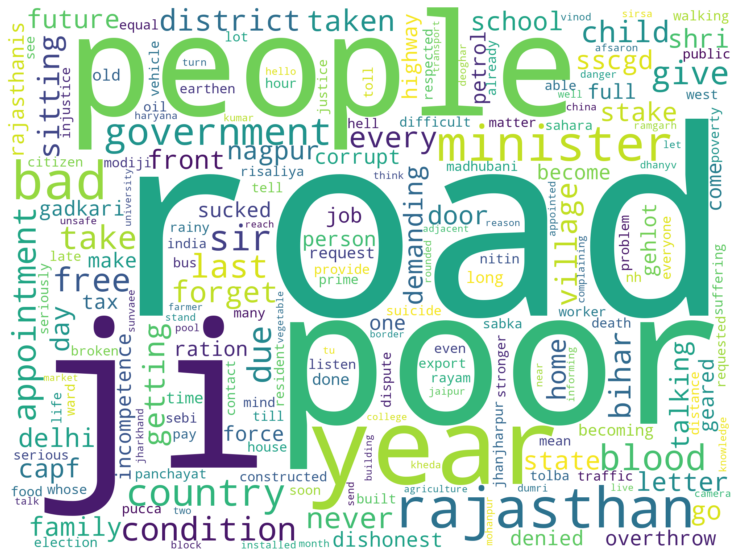

In [ ]:
print(counted_words.most_common()[:5])
idx=int(input('Enter index of entity to show cloud of that entity :'))
word_cloud_string=create_word_cloud_for_text(uname,idx-1)
final_wc_strings=[]
for str1 in word_cloud_string:
  final_wc_strings.append(text_to_tokens(str1))

wordcloud_creator(final_wc_strings)


In [ ]:
response=input('do you want to show supportive tweets??(y/n):')
if response=='y':
  print('\n')
  print(*word_cloud_string,sep='\n\n')

do you want to show supportive tweets??(y/n):y
the future of the children of poor families is at stake since year demanding appointment of sscgd capf from delhi to nagpur shri ji is sitting in front of your door that you give us appointment letter after talking to home minister ji will get

 i am a resident of panchayat rayam west ward no tolba of jhanjharpur district madhubani state bihar we do not have a pucca road here there is an earthen road it was very difficult to go to school on rainy days so it is requested to get this road constructed soon contact no 

 we think this bus stand is not well built nh near dumri pool 

 gadkari ji i am informing you from vinod kumar risaliya kheda risaliya tu ramgarh road which has not been built even for only two months and it is broken afsaron has rounded it after complaining we are not getting any sunvaee sirsa haryana dhanyv

rajasthans corrupt dishonest incompetence he denied that every person of rajasthan has geared up with full force to ov

In [ ]:
while(1):
  print(counted_words.most_common()[:5])
  idx=int(input('Enter index of entity to show cloud of that entity or type 100 to exit:'))
  if idx == 100:
    break

  word_cloud_string=create_word_cloud_for_text(uname,idx-1)
  final_wc_strings=[]
  for str1 in word_cloud_string:
    final_wc_strings.append(text_to_tokens(str1))

  wordcloud_creator(final_wc_strings)
  response=input('do you want to show supportive tweets??(y/n):')
  if response=='y':
    print(*word_cloud_string,sep='\n')